<h1><center>Sujet de projet: Segmentation des clients</center></h1>


### Objectifs et consistance du projet ML :

    L’objectif du projet ML est de mettre en pratique les notions traitées dans le module de Machine Learning en les appliquant sur des problématiques réelles à travers la mise en œuvre d’un pipeline ML complet allant de la présentation et la compréhension de la problématique au déploiement de la solution ML.


### Livrables du projet :

#### Les livrables de ce projet sont constitués de :
    • Rapport (pdf) décrivant le processus de mise en œuvre du projet ML en explicitant les étapes citées ci-dessus avec la mention du lien URL de l’application déployée. 
    • Fichier notebook complet traçant les différentes activités effectuées pour la réalisation du projet en donnant l’ensemble des résultats (traitement de graphiques, …)

<h3>1 - Présentation de la problématique/sujet en explicitant le rôle du ML par rapport au sujet</h3>

    La segmentation de la clientèle est la méthode de répartition d'une clientèle en
    groupes de personnes (cluster) en fonction de caractéristiques mutuelles afin que les
    organisations puissent commercialiser grouper efficacement et avec
    compétence individuellement a l'aide de la technologie du Machine Learning qui permet de recouper des comportements (parfois inattendus) et d’établir des groupes susceptibles d’être ensuite intéressés par des offres ciblées. Soit sur certains produits spécifiques, soit sur des moments clés. Cette segmentation amène à mieux connaître et, surtout, à mieux orienter la clientèle en fonction de ses habitudes les plus marquées. Il est envisageable de déployer un dispositif marketing approprié (stand dédié, promotion du moment, offre flash…), a priori totalement personnalisé, qui séduira inévitablement le client visé et augmentera son panier moyen. Ou comment cibler le bon client, au bon moment, avec le bon message. Pour lui faire vivre une expérience client améliorée et l’inciter à consommer davantage ou sur des produits upgradés. 

### 2 - Etat de l’art (étude bibliographique) synthétique présentant les différents algorithmes ML utilisés pour le traitement de la problématique en question
     Tous les modèles de Machine Learning sont classés en deux catégories : supervisé ou non supervisé. Si          le modèle est un modèle supervisé, il peut-être de 2 types ou sous-catégories : modèle de régression ou de classification.




    -L’apprentissage supervisé consiste à apprendre à une fonction à faire correspondre une entrée à une sortie en se basant sur des exemples connus (des paires entrée-sortie).
    - La classification consiste à attribuer une classe ou catégorie à chaque objet (ou individu) à classer, en se fondant sur des données statistiques.
    -Notre problématique en question est une problématique de classification, et parmi les algorithmes pour la traiter on a les 5 modèles suivants qu’on va tester pour choisir un avec lequel on va déployer notre application.



    •	le cluster K-Means :
    K-Means est sans doute l’algorithme de regroupement le plus reconnu. La plupart des cours d’apprentissage machine et de science des données, en particulier les cours d’introduction, enseignent cet algorithme. Sa compréhension est assez facile, et son implémentation dans le code est encore plus simple. K-Means se distingue des autres algorithmes par son rythme rapide. La plupart d’entre nous calculent les distances entre les centres de groupes et les points avec un minimum de calculs. Ainsi, la complexité est souvent linéaire O{n).
    •	le cluster Gaussian Mixture Model :
    Un modèle de mélange gaussien (usuellement abrégé par l'acronyme anglais GMM pour Gaussian Mixture Model) est un modèle statistique exprimé selon une densité mélange. Il sert à estimer paramétriquement la distribution de variables aléatoires en les modélisant comme une somme de plusieurs gaussiennes (appelées noyaux). Il s'agit alors de déterminer la variance, la moyenne et l'amplitude de chaque gaussienne. Ces paramètres sont optimisés selon un critère de maximum de vraisemblance pour approcher le plus possible la distribution recherchée. Cette procédure se fait le plus souvent itérativement via l'algorithme espérance-maximisation (EM).
    •	Le clusterer  chiérarchique
    Dans le cas du clustering agglomératif (ou bottom-up), on commence par considérer que chaque point est un cluster à lui tout seul. Ensuite, on trouve les deux clusters les plus proches, et on les agglomère en un seul cluster. On répète cette étape jusqu'à ce que tous les points appartiennent à un seul cluster, constitué de l'agglomération de tous les clusters initiaux.
    •	Le cluster Spectral:
    En informatique théorique, le partitionnement spectral
    Ou spectral clustering en anglais, est un type de
    Partitionnement de données prenant en compte les
    Propriétés spectrales de l'entrée. Le partitionnement
    Spectral utilise le plus souvent les vecteurs propres
    D’une matrice de similarités. Wikipédia

    •	Le cluster MeanShift :
    L'algorithme de clusterting appelé Mean-Shift consiste à effectuer des estimations locales du gradient de la densité aux points de données, puis à bouger ces points le long du gradient estimé de manière itérative, jusqu'à ce qu'il y ait convergence : les points stationnaires de ce procédé correspondent aux maximaux locaux de la distribution. Et finalement, les points qu'on associe à un même point stationnaire seront classifiés comme faisant partie du même cluster.


### Importation des packages

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# For generating some data
from sklearn.datasets import make_blobs


from sklearn.cluster import KMeans
from sklearn import mixture

# For creating some circles around the center of each cluster within the visualizations
from scipy.spatial.distance import cdist
# For creating some circles for probability area around the center of each cluster within the visualizations
from matplotlib.patches import Ellipse

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing, metrics, cluster
from sklearn.cluster import KMeans


In [8]:
from pandas import set_option

###  - Exploration des données (types des variables, spécification de la variable Target, clustering…)

    On importe la data d’abord, et on explore son début pour avoir idée 


In [9]:
df = pd.read_excel('/Users/maya/Documents/Online Retail.xlsx')

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### Informations sur la data qu'on va etudier:

    -InvoiceNo : numéro de facture. 
    -StockCode: code du produit (article).
    -Description : Nom du produit (article). 
    -Quantity: Les quantités de chaque produit (article) par transaction. 
    -InvoiceDate: Date et heure de la facture. Numérique, 
    -UnitPrice:prix unitaire.
    -CustomerID:numéro de compte client
    -Country:Nom du pays.

#### Affichage du type  data frame:

In [11]:
type(df)

pandas.core.frame.DataFrame

#### Affichage de la taille avec les information des elements dans le data frame

In [12]:
df.shape

(541909, 8)

#### On vérifie le dataset est construit de combien de lignes et de colonnes, on retrouve le dataframe a 541909 lignes et 8 colonnes.

#### On exécute dataframe.info() pour avoir idée sur le type des variables pour chaque colonne 


In [13]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


#### Calcul de nombre de Nan dans Data Frame


In [14]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

#### 4 - Pré-processing des données (traitement des données manquantes, encoding, normalisation, outliers…) & Feature Selection

    Dans cette étape, nous allons préparer les données avant la modélisation. Ici, nous allons nettoyer les données des mauvaises entrées, vider les entrées, ajuster les types de données, normaliser les données, éliminer les valeurs aberrantes, analyser les données exploratoires, effectuer l'ingénierie des fonctionnalités et sélectionner, mettre à l'échelle et gérer les déséquilibres des jeux de données.

#### On supprime les données manquantes : 


In [15]:
df = df[~df.CustomerID.isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


#### On veut avoir une idée sur les pays ont online retail market : 

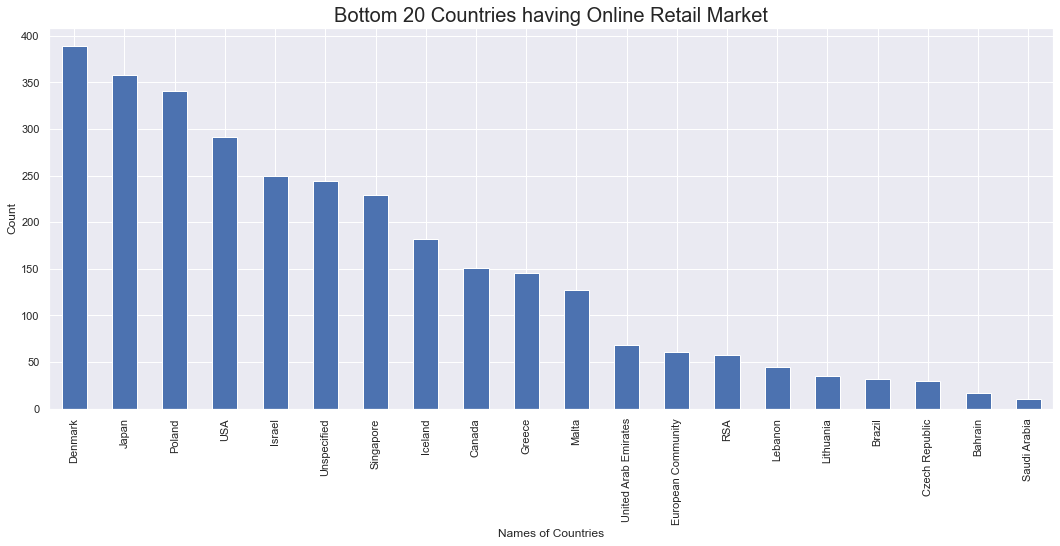

In [16]:
# checking the different values for country in the dataset
df['Country']. value_counts().tail(20).plot.bar(figsize = (18, 7))
plt. title ('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt. xlabel ('Names of Countries')
plt. ylabel ('Count' )
plt. show()

#### Danemark est le pays qui a un online retail market.
#### On veut s’avoir la quantité de produit achéter par chaque pays : 


In [17]:
# Voir La quantité de produit vendu dans chaque pays.
df['Quantity'].groupby(df['Country']).agg('sum')

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     136329
European Community          497
Finland                   10666
France                   109848
Germany                  117448
Greece                     1556
Iceland                    2458
Israel                     3990
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16044
RSA                         352
Saudi Arabia                 75
Singapore                  5234
Spain                     26824


#### On veut avoir une visualisation : 

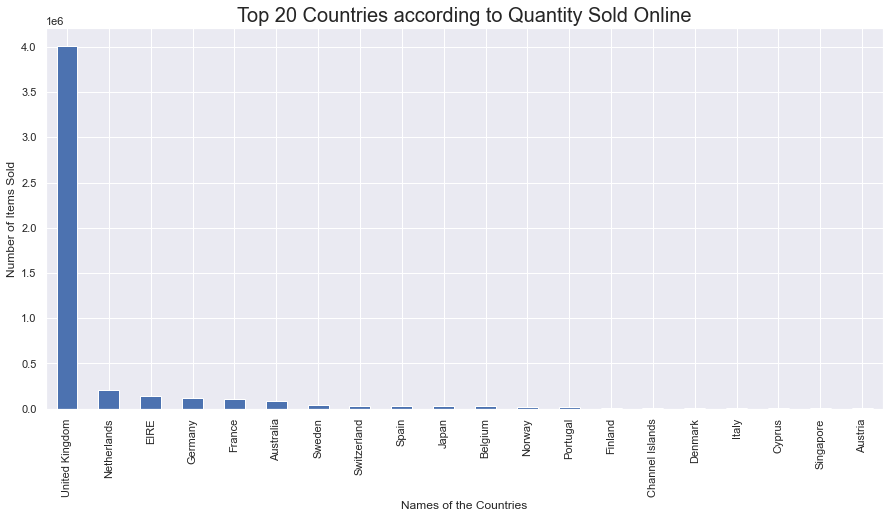

In [18]:
# Having a Look at the top 20 Countries in terms of Quantities according to the countries
df['Quantity'].groupby(df['Country']).agg('sum').sort_values (ascending = False).head(20).plot.bar(figsize = (15, 7))
plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

#### United kingdom est le pays qui achète plus de produit (4269472.0). 

### Statistique descriptive

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
print(df.shape)
print(df.describe())

(406829, 8)
            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


We see quantity column has a large negative value. Probably negative values are not valid for this analysis. Drop the records having negative values in frequency. Verify that there is not more nagative values in the columns


#### Ici, nous pouvons observer que certains clients ont commandé en quantité négative, ce qui n'est pas possible. Nous devons donc filtrer Quantité supérieure à zéro.

In [21]:
df = df[df.Quantity>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [22]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


#### Creation d'une nouvelle colonne pour avoir le total de tout les article acheté par chaque client


In [23]:
df["TotalPrice"] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Pour calculer la récence, on utilise le Max pour InvoiceDate comme point de référence



In [24]:
last_date = df.InvoiceDate.max()
last_date

Timestamp('2011-12-09 12:50:00')

In [25]:
df_fix = df.sample(10000, random_state = 42)
df_fix.shape

(10000, 9)

### 5 - Application des algorithmes ML (au moins 5 algorithmes) avec la présentation des résultats de chaque algorithme (indicateurs d’évaluation, graphes…)

Maintenant que toutes les données sont propres et prêtes à être saisies dans le modèle, il est temps pour nous de créer un modèle et de rechercher le modèle le plus stable.
Dans cette partie, on évalue immédiatement après avoir créé le modèle, et on teste pour voir plus facilement quel modèle est le plus optimal.

creation d'une fonction qui peut ensuite être entraînée et testée, puis évaluée

<h3><h3>L'analyse RFM (Récence, Fréquence, Monétaire) est une approche comportementale regroupant les clients en segments. Il regroupe les clients en fonction de leurs transactions d'achat précédentes en tenant compte de facteurs tels que
· Depuis combien de temps
· À quelle fréquence
· Combien un client a-t-il acheté
RFM filtre les clients en différents groupes dans le but d'un meilleur service. Il aide les gestionnaires à identifier les clients potentiels pour faire une entreprise plus rentable.<h3><h3>


### Calculate the R-F-M.

In [26]:
# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalPrice': 'MonetaryValue'}, inplace=True)

In [27]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,4,93.0
12348.0,75,2,160.8
12349.0,19,3,51.3
12352.0,80,1,17.0
12353.0,204,1,19.9


#### Nous évaluerons mieux le client "Recency" qui a été actif plus récemment que le client moins récent, car chaque entreprise souhaite que ses clients soient récents.

#### Nous attribuerons une note plus élevée à la «Frequency» et à la «MonetaryValue» car nous voulons que le client dépense plus d'argent et visite plus souvent (c'est un ordre différent de la récence).

### Gérer l'asymétrie

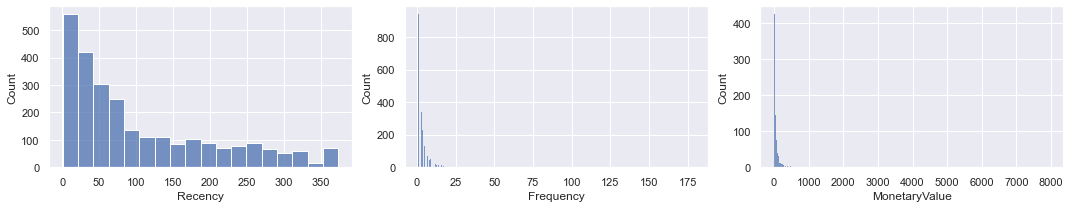

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.histplot(customers['Recency'], ax=ax[0])
sns.histplot(customers['Frequency'], ax=ax[1])
sns.histplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

### analyse_asymétrie

In [29]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(customers[x], ax=ax[0,0])
    sns.histplot(np.log(customers[x]), ax=ax[0,1])
    sns.histplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.histplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

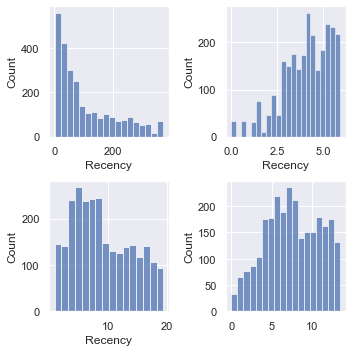

1.01
-0.76
0.38
-0.09


In [30]:
analyze_skewness('Recency')

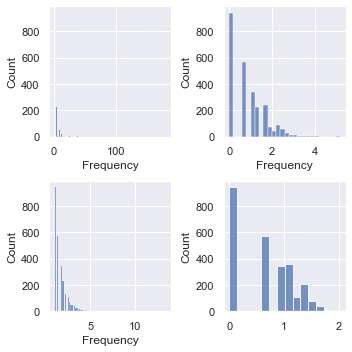

13.94
0.83
3.62
0.15


In [31]:
analyze_skewness('Frequency')

### Métriques récapitulatives par score RFM

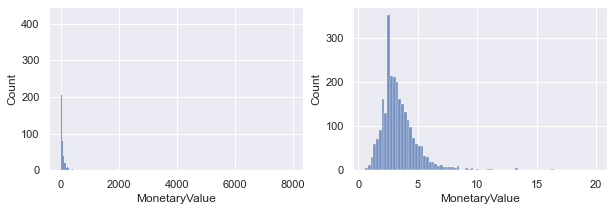

16.75
2.83


In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.histplot(customers['MonetaryValue'], ax=ax[0])
sns.histplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [33]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([4.5306549 , 5.43786825, 3.71568699, ..., 4.11342023, 3.76194708,
       5.25527814])

In [34]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2657,11.839546,0.000000,1.909281
2658,10.094469,0.000000,2.457964
2659,9.914022,0.868462,4.113420
2660,1.653436,1.638849,3.761947
2661,7.038637,1.033840,5.255278


### La Normalisation et La Standardisation des variables 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0. -0. -0.]
[1. 1. 1.]


In [36]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-2.002580,0.775820,0.633098
1,0.065776,-0.049489,1.176611
2,-0.940171,0.463937,0.144849
3,0.121983,-1.173884,-0.540766
4,1.046608,-1.173884,-0.457728


### Puisque nous avons préparé avec succès le tableau RFM-T, nous pouvons passer à la partie passionnante ; classification des clients avec sklearn! Juste un petit rappel pour le tableau : les valeurs 0 ne nous dérangent pas car le client concerné peut se faire rembourser, ou profiter de certaines promotions. De cette manière, la valeur monétaire ajoutée devient nulle. Pour construire notre modèle KMeans, nous devons décider du nombre de segments avec la méthode du coude, puis nous pouvons construire le modèle en utilisant cette quantité de clusters/segments. Après cela, nous humaniserons le modèle non supervisé.

### Modelling
##### Choose k-number

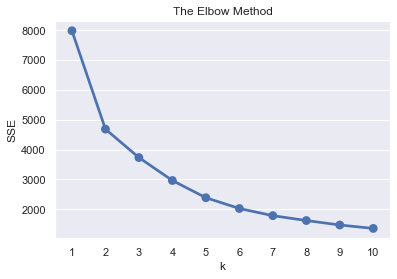

In [37]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [38]:
from yellowbrick.cluster import KElbowVisualizer

#### Selon le graphique , nous déterminons le nombre de clusters en appliquant l'algorithme k-means à l'ensemble de données X.

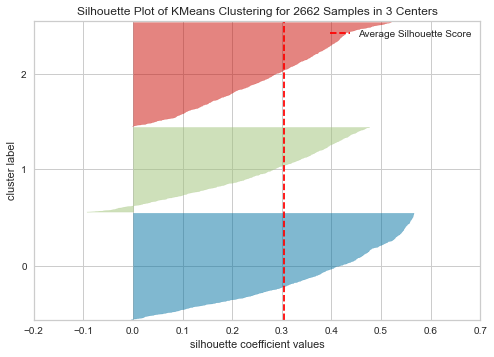

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2662 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(customers_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [73]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2662,)

In [74]:
customers.shape

(2662, 4)

##### Cluster Analysis

In [75]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,2,4,93.0,3
12348.0,75,2,160.8,3
12349.0,19,3,51.3,3
12352.0,80,1,17.0,0
12353.0,204,1,19.9,2


In [76]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          44.4       1.5          22.5   757
1          44.1      17.9         973.2   104
2         227.3       1.6          31.2   883
3          48.0       6.1          85.1   918

#### Snake Plots

<h3><h3>Technique d'étude de marché pour comparer différents segments
Représentation visuelle des attributs de chaque segment
Besoin de normaliser d'abord les données (centre et échelle)
on trace les valeurs normalisées moyennes de chaque cluster de chaque attribut<h3><h3>

In [77]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,Cluster
0,-2.002580,0.775820,0.633098,3
1,0.065776,-0.049489,1.176611,3
2,-0.940171,0.463937,0.144849,3
3,0.121983,-1.173884,-0.540766,0
4,1.046608,-1.173884,-0.457728,2


In [78]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,Attribute,Value
0,Recency,-2.002580
1,Recency,0.065776
2,Recency,-0.940171
3,Recency,0.121983
4,Recency,1.046608


In [79]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          44.4       1.5          22.5   757
1          44.1      17.9         973.2   104
2         227.3       1.6          31.2   883
3          48.0       6.1          85.1   918

In [80]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,-0.593843,-0.732649,-0.582036
1,NaN,3.753206,10.572981,-0.585590
2,NaN,-0.576130,-0.629103,1.137890
3,NaN,0.618658,0.011463,-0.548207


### On Applique le GMM, Hierarchical ,Spectral ,MeanShift clusters et on fait la Silhouette pour savoir lequels est bien comme model afin de choir un model final 

 ### GMM Algorithm

In [81]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

siliuette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(df_normalized)
        sil_score = metrics.silhouette_score(df_normalized, gmm, metric='euclidean')
        siliuette_list_GMM.append((cluster, sil_score, covariance_type, len(set(gmm))))

df_gmm = pd.DataFrame(siliuette_list_GMM, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])



In [82]:
df_gmm.sort_values('sil_score', ascending=False).tail()

,cluster,sil_score,covariance_type,number_of_clusters
34,18,0.292322,diag,18
39,20,0.291601,spherical,20
38,20,0.264639,diag,20
32,18,0.255883,full,18
36,20,0.252166,full,20


### Hierarchical Algorithm 

In [83]:
# importing the required libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics

In [84]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_normalized)
        sil_score = metrics.silhouette_score(df_normalized, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative))))

df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [85]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
2,2,0.711167,complete,2
1,2,0.711167,average,2
3,4,0.529607,ward,4
7,6,0.522820,average,6
8,6,0.515648,complete,6
10,8,0.481004,average,8
13,10,0.443247,average,10
16,12,0.440613,average,12
4,4,0.434796,average,4
0,2,0.425752,ward,2


### Spectral Algorithm

In [86]:
# importing the required libraries
from sklearn import cluster
from sklearn.cluster import SpectralClustering

In [87]:
silhouette_list_spectral= []

for cluster in range(2,10):
    for neighbours in np.arange (3,10,2): 
        spectral = SpectralClustering(n_clusters=cluster, assign_labels="discretize", affinity="nearest_neighbors", random_state=0).fit_predict(df_normalized)### MeanShift Algorithm
        sil_score = metrics.silhouette_score(df_normalized, spectral, metric='euclidean')
        silhouette_list_spectral.append((cluster, sil_score, neighbours))
    
df_spectral= pd.DataFrame(silhouette_list_spectral, columns=['cluster', 'sil_score', 'neighbours'] )


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warni

In [88]:
df_spectral.sort_values('sil_score', ascending= False)

,cluster,sil_score,neighbours
21,7,0.319753,5
20,7,0.319753,3
22,7,0.319753,7
23,7,0.319753,9
24,8,0.281145,3
25,8,0.281145,5
27,8,0.281145,9
26,8,0.281145,7
1,2,0.203008,5
0,2,0.203008,3


### MeanShift Algorithm

In [89]:
from sklearn.cluster import MeanShift

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [90]:
ms = MeanShift()
ms.fit(df_normalized)
cluster_centers = ms.cluster_centers_

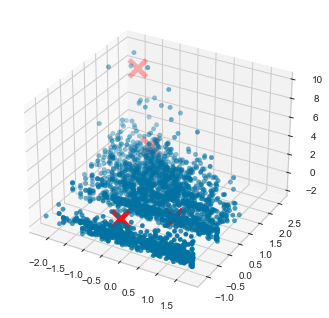

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.scatter(df_normalized.iloc[:, 0], df_normalized.iloc[:, 1], df_normalized.iloc[:, 2], marker ='o')
  
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='x', color ='red',
           s = 300, linewidth = 5, zorder = 10)
 
plt.show()

In [92]:

from sklearn.utils.multiclass import unique_labels

In [93]:
from numpy import unique
from sklearn.cluster import  estimate_bandwidth
bandwidth = estimate_bandwidth(df_normalized, quantile=0.2, n_samples=500)

In [94]:
from numpy.random import rand

In [95]:
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(df_normalized)
cluster_centers = msc.cluster_centers_
labels = msc.labels_
cluster_label = np.unique(labels)
n_clusters = len(cluster_label)
n_clusters


7

### Calculate Silhouette Score for all the Algorithme of clusters 

In [96]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [98]:
km = KMeans(n_clusters=4)
km.fit(df_normalized)
# check how many unique labels do you have
np.unique(km.labels_)

array([0, 1, 2, 3], dtype=int32)

In [65]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=7).fit_predict(df_normalized)


In [99]:
score1=metrics.silhouette_score(df_normalized, agglomerative, metric='euclidean')
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.249


In [100]:
score2=metrics.silhouette_score(df_normalized,msc.labels_,metric='euclidean')
print('Silhouetter Score: %.3f' % score2)

Silhouetter Score: 0.523


In [101]:
score3=metrics.silhouette_score(df_normalized,spectral,metric='euclidean')
print('Silhouetter Score: %.3f' % score3)

Silhouetter Score: 0.181


In [102]:
score4= metrics.silhouette_score(df_normalized,gmm,metric='euclidean')
print('Silhouetter Score: %.3f' % score4)

Silhouetter Score: 0.292


In [103]:
score5=metrics.silhouette_score(df_normalized,km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score5)


Silhouetter Score: 0.530


#### Le score de silhouette de 1 signifie que les grappes sont très denses et bien séparées. Le score de 0 signifie que les clusters se chevauchent. Le score inférieur à 0 signifie que les données appartenant aux clusters peuvent être fausses/incorrectes.

#### ici tous les clusters que nous avons, ils se chevauchent, 
### on va choisir le modèle  de K-Means car il un score plus élevé  que les autres cluster 

### Déploiement de l’application sur Streamlit en local 

In [104]:
import pickle

In [105]:
pickle.dump(km,open('/Users/maya/Downloads/10_Deploiement_streamlit/model_df_normalized.pkl' ,'wb'))

### voila le lien de l'appliquation pour predir le revenu:  https://online-rt.herokuapp.com/